# Plotting feature measurements by 3 people

In this notebook I plot the measurements by me, Emily, and Anish against each other to compare our results.
The two most important functions are comparison_plots() and total_plot().
* comparison_plots() creates 8 individual figures (one for each feature) with three comparison plots per figure.
* total_plot() creates one plot of a single comparison, including all feature measurements.

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [149]:
# import tables as dataframes
ella1 = pd.read_csv('results copy/ella_csp.csv')
emily = pd.read_csv('results copy/emily_csp.csv')
anish = pd.read_csv('results copy/anish_csp.csv')
inter = ella1[ella1.obj_id != '2007le']
ella = inter[inter.obj_id != '2008ia']

In [173]:
def data_to_plot(set1, set2, feat):
    '''return pew values for 2 people for a given feature
    
    Parameters:
    set1: first person to compare
    set2: second person to compare
    feat: feature name (ex. pW1)
    
    Returns:
    set1_data: list of measurements
    set2_data: list of measurements'''
    
    if feat == 'all':
        set1_feat = set1
        set2_feat = set2
    else:
        
        # identifying only rows with a specific feature measurement
        set1_feat = set1[set1['feat_name'] == feat]
        set2_feat = set2[set2['feat_name'] == feat]
    
    # setting indices to shared values
    set1_feat2 = set1_feat.set_index(['obj_id', 'time', 'feat_name'])
    set2_feat2 = set2_feat.set_index(['obj_id', 'time', 'feat_name'])
    
    # combining the two tables
    combined_table = set1_feat2.join(set2_feat2, lsuffix=f'{set1}', rsuffix=f'{set2}')
    
    # dropping NaNs, i.e. rows without shared measurements
    final_table = combined_table.dropna(subset=[f'pew{set1}', f'pew{set2}'])
    
    # data to be plotted
    set1_data = final_table[f'pew{set1}']
    set2_data = final_table[f'pew{set2}']
    
    return set1_data, set2_data
    

In [161]:
def bounds_finder(set1, set2, feat):
    '''find mininum and maximum for data to be plotted
    
    Parameters:
    set1: first person data
    set2: second person data
    
    Returns:
    min_bound: lower bound of data
    max_bound: upper bound of data'''
    
    data1, data2 = data_to_plot(set1, set2, feat)
    
    min1 = np.min(data1)
    min2 = np.min(data2)
    
    max1 = np.max(data1)
    max2 = np.max(data2)
    
    if min1 <= min2:
        min_bound = min1
    else:
        min_bound = min2
        
    if max1 >= max2:
        max_bound = max1
    else:
        max_bound = max2
        
    return min_bound, max_bound

## Final comparison plotting function

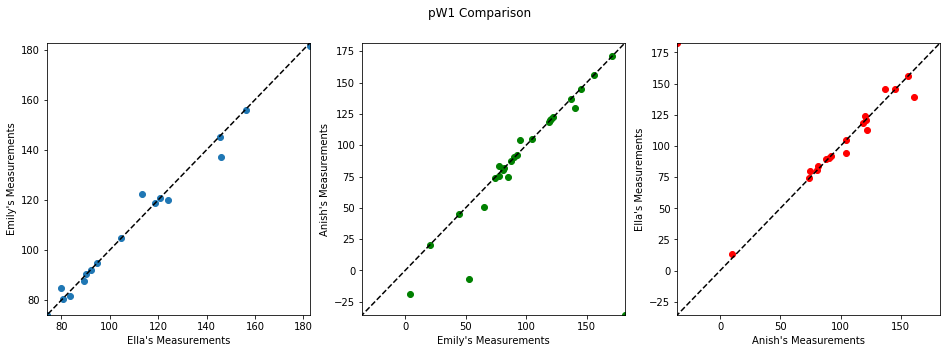

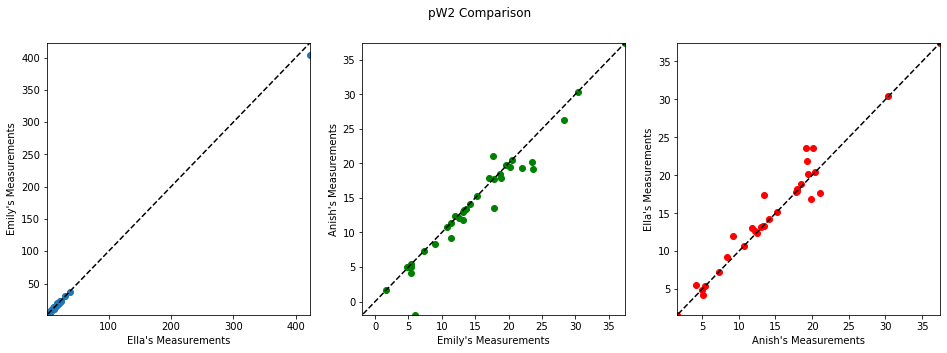

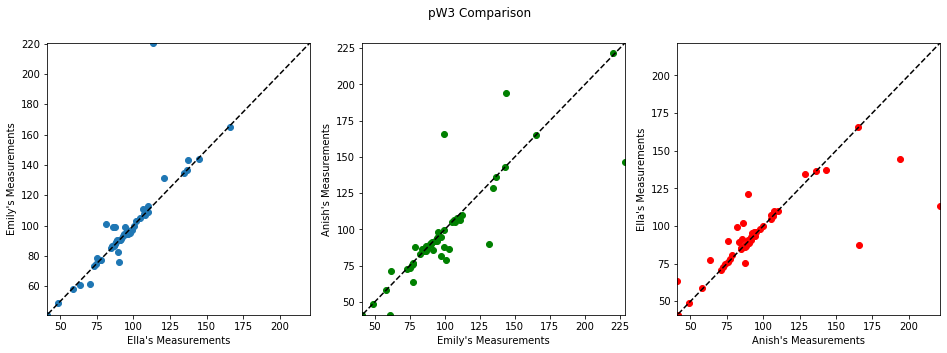

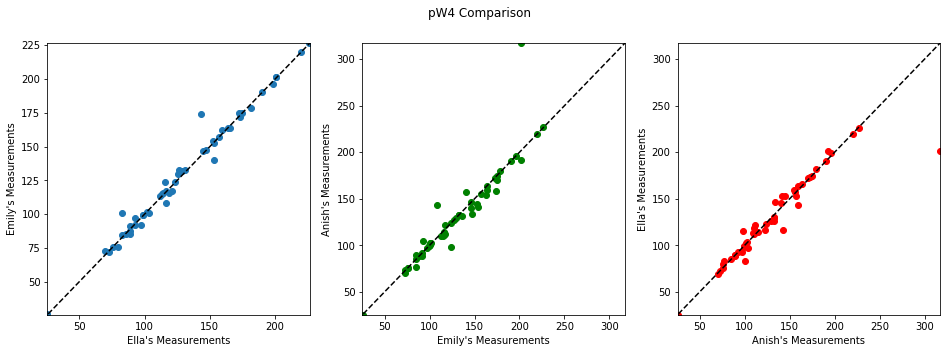

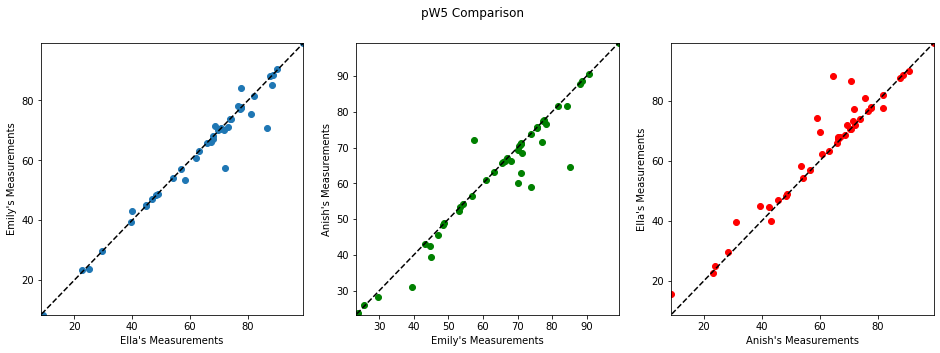

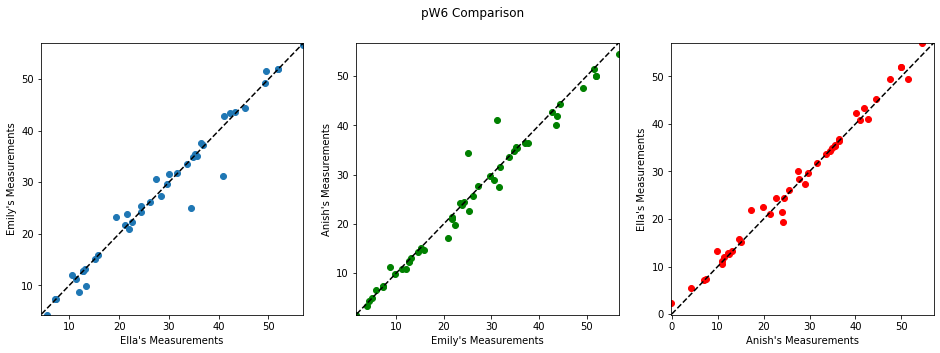

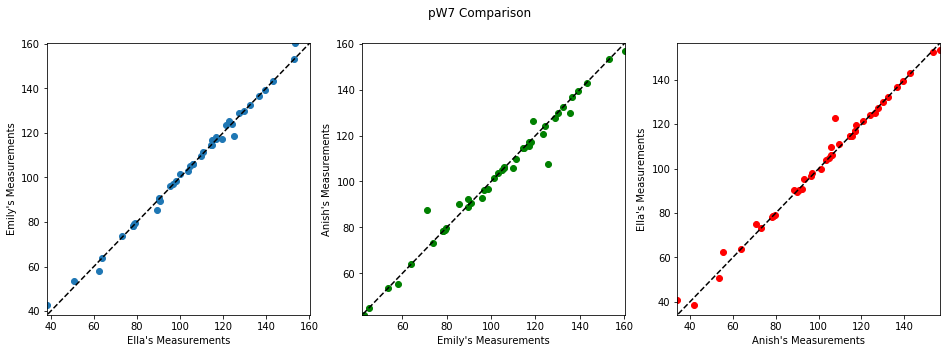

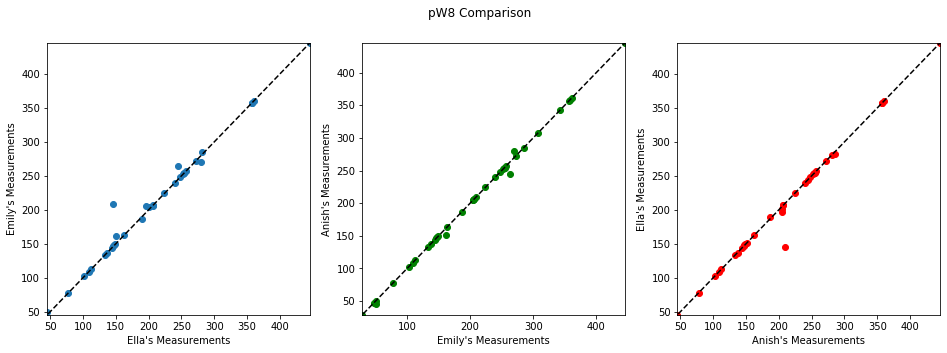

In [196]:
def comparison_plots():
    '''plot the 3 sets of comparisons for all 8 features'''
    
    for feat_name in ['pW1', 'pW2', 'pW3', 'pW4', 'pW5', 'pW6', 'pW7', 'pW8']:
    
        # getting the data to be plotted in each figure
        ella_fig1, emily_fig1 = data_to_plot(ella, emily, feat_name)

        emily_fig2, anish_fig2 = data_to_plot(emily, anish, feat_name)

        anish_fig3, ella_fig3 = data_to_plot(anish, ella, feat_name)

        # data to plot the line y=x, goes from the minimum measurement in all three sets to the maximum (roughly)
        x = np.arange(-60, 450)

        # creating the figure
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5), sharex=False)
        fig.suptitle(f'{feat_name} Comparison')
    
        # plotting the leftmost figure
        min1, max1 = bounds_finder(ella, emily, feat_name)
    
        ax1.scatter(ella_fig1, emily_fig1)
        ax1.plot(x, x, color='black', linestyle='--')
        ax1.set_xlim(min1, max1)
        ax1.set_ylim(min1, max1)
        ax1.set_xlabel("Ella's Measurements")
        ax1.set_ylabel("Emily's Measurements")
    
        # plotting the middle figure
        min2, max2 = bounds_finder(emily, anish, feat_name)
    
        ax2.scatter(emily_fig2, anish_fig2, c='green')
        ax2.plot(x, x, color='black', linestyle='--')
        ax2.set_ylim(min2, max2)
        ax2.set_xlim(min2, max2)
        ax2.set_xlabel("Emily's Measurements")
        ax2.set_ylabel("Anish's Measurements")
    
        # plotting the rightmost figure
        min3, max3 = bounds_finder(anish, ella, feat_name)
    
        ax3.scatter(anish_fig3, ella_fig3, c='red')
        ax3.plot(x, x, color='black', linestyle='--')
        ax3.set_ylim(min3, max3)
        ax3.set_xlim(min3, max3)
        ax3.set_xlabel("Anish's Measurements")
        ax3.set_ylabel("Ella's Measurements")
    
        #plt.savefig(f"{feat_name}comparison.png")
        
comparison_plots()

## All features plotted against each other function

In [204]:
def total_plot(set1, set2):
    '''create plot for all measurements for 2 people
    
    Parameters:
    set1: first data set to be plotted
    set2: second data set to be plotted
    
    Returns:
    none'''
    
    x, y = data_to_plot(set1, set2, 'all')
    min_bound, max_bound = bounds_finder(set1, set2, 'all')
    x_fit = np.arange(0,500)
    y_fit = np.arange(0,500)
    plt.scatter(x, y, alpha = .4)
    plt.xlabel("Set 1 Measurements")
    plt.ylabel("Set 2 Measurements")
    plt.title("Set 2 vs. Set 1 PEW Measurements")
    plt.axis('square')
    plt.plot(x_fit, y_fit, 'black', linestyle = '--')
    plt.xlim(0, max_bound)
    plt.ylim(0, max_bound)